In [ ]:
#install packages
import pandas as pd
import scipy
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import PIL
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
#function to compare images
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving guy-rose_country-landscape.jpg to guy-rose_country-landscape.jpg
Saving guy-rose_laguna-coast-1910.jpg to guy-rose_laguna-coast-1910 (1).jpg
Saving henri-matisse_green-needles-on-the-cross-javernaz-1901.jpg to henri-matisse_green-needles-on-the-cross-javernaz-1901.jpg


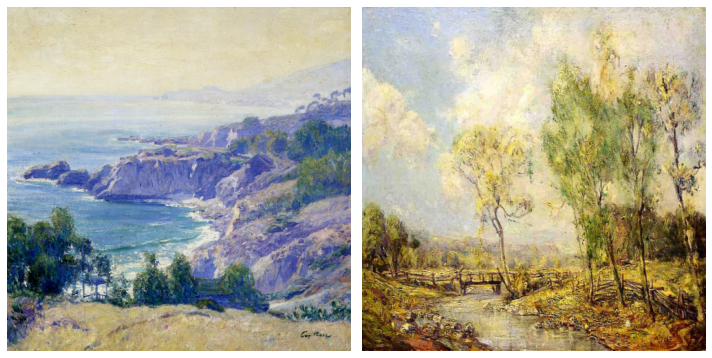

In [ ]:
#load image files
img_1 = cv.imread("guy-rose_laguna-coast-1910.jpg")
img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_2 = cv.imread("guy-rose_country-landscape.jpg")
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

dim = (500, 500)
# resize image
img_1 = cv.resize(img_1, dim, interpolation = cv.INTER_AREA)
img_2 = cv.resize(img_2, dim, interpolation = cv.INTER_AREA)

show_img_compar(img_1, img_2)

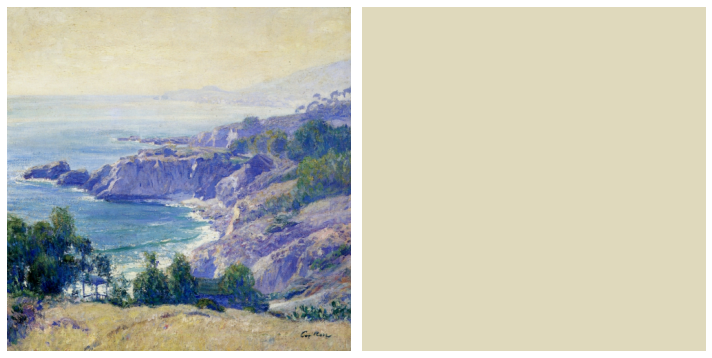

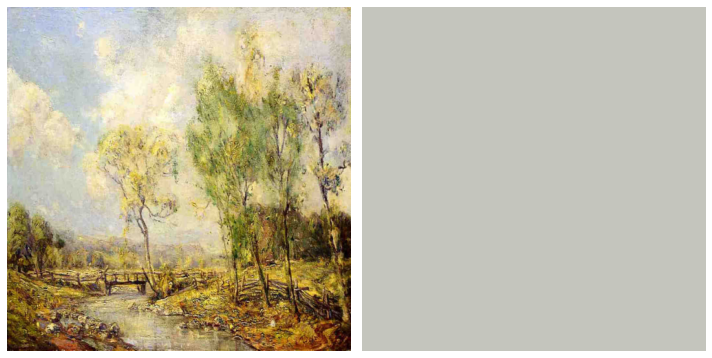

In [ ]:
#extract the most present colour
img_temp1 = img_1.copy()
unique, counts = np.unique(img_temp1.reshape(-1, 3), axis=0, return_counts=True)
img_temp1[:,:,0], img_temp1[:,:,1], img_temp1[:,:,2] = unique[np.argmax(counts)]

img_temp_2 = img_2.copy()
unique, counts = np.unique(img_temp_2.reshape(-1, 3), axis=0, return_counts=True)
img_temp_2[:,:,0], img_temp_2[:,:,1], img_temp_2[:,:,2] = unique[np.argmax(counts)]

show_img_compar(img_1, img_temp1)
show_img_compar(img_2, img_temp_2)

[215.93145922 212.71069456 192.45349223]
[112.18697715 119.41097515 116.55899613]
[125.10145578 140.27915065 171.67215506]
[17.68595854 45.47458012 63.93803904]
[177.98352548 163.7225306  127.53024481]
[166.99569422 179.22448458 193.53464696]
[ 57.74409665  82.94423643 104.51540113]
[ 84.96742862 101.90196964 158.17252439]


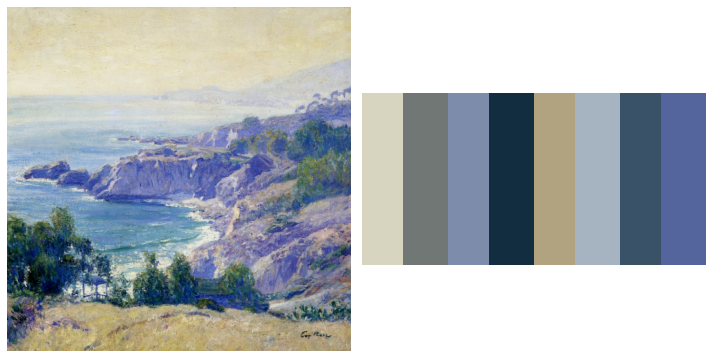

[199.10653906 202.15147688 199.41452099]
[105.69156515  77.93204907  33.27163512]
[196.26240816 179.89269756 123.02123257]
[58.8142401  34.05453384 15.33742018]
[219.27697068 205.85087436 161.71393597]
[235.16982119 226.52480916 201.27342361]
[169.02048805 151.13852322  88.24816113]
[142.48436476 118.06350629  55.09463886]


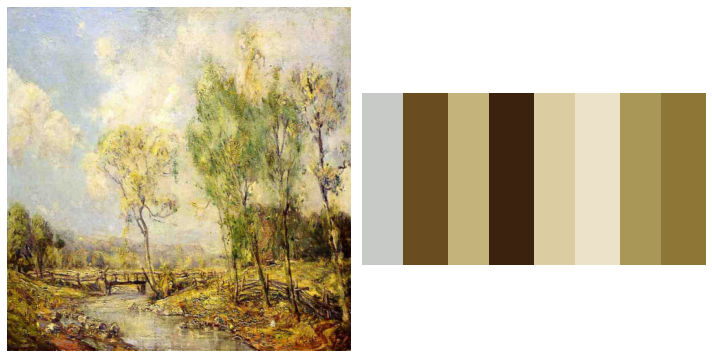

In [ ]:
#display eight pallets of the colours presents in the images using kmeans
clt = KMeans(n_clusters=8)
def palette(clusters):
    width=100
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]   
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers 
        #print RGB pixel values of each colour palette
        print(centers)
    return palette

  
clt_1 = clt.fit(img_1.reshape(-1, 3))
show_img_compar(img_1, palette(clt_1))

clt_2 = clt.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette(clt_2))

[211.28307582 202.60775862 170.66245651]
[125.64817584 101.9945211   50.82081981]


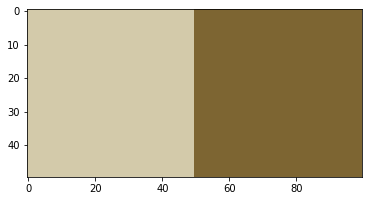

In [ ]:
plt.imshow(palette(clt_1), interpolation='none')
plt.show()

[151.949008 158.174992 160.571188]
[151 158 160]
979EA0


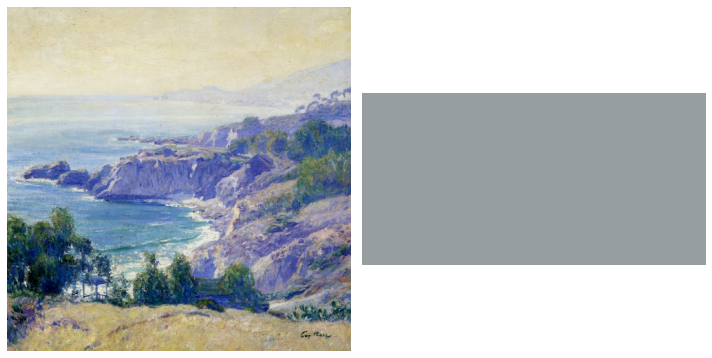

[179.210408 164.925284 125.778408]
[179 164 125]
B3A47D


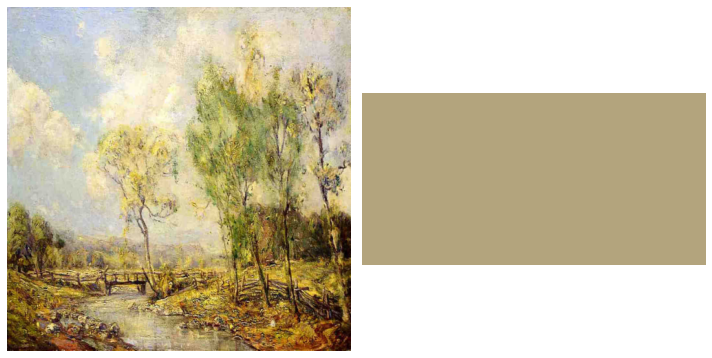

In [ ]:
#convert RGB pixel Value into Colour coding
def rgb_to_hex(r, g, b):
    return ('{:X}{:X}{:X}').format(r, g, b)

def hex_to_rgb(hex):
    rgb = []
    for i in (0, 2, 4):
        decimal = int(hex[i:i+2], 16)
        rgb.append(decimal)
    return tuple(rgb)


clt = KMeans(n_clusters=1)
def palette(clusters):
    width=100
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]   
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
        print(centers)
        centre_int=centers.astype(int)
        print(centre_int)
        print(rgb_to_hex(*centre_int,)) #use *v, to unpack list of items from a tuple
        #d =(*v,)
        #print(d)
        #print(rgb_to_hex(73,61 ,41))
        #print(hex_to_rgb('493D29'))
    return palette

  
clt_1 = clt.fit(img_1.reshape(-1, 3))
show_img_compar(img_1, palette(clt_1))

clt_2 = clt.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette(clt_2))